In [16]:
import pandas as pd
import numpy as np

In [17]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [18]:
!wget $data

--2025-10-09 15:26:02--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1.41M  4.89MB/s    in 0.3s    

2025-10-09 15:26:03 (4.89 MB/s) - ‘data.csv.3’ saved [1475504/1475504]



In [19]:
df=pd.read_csv('data.csv')

In [20]:
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [21]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [22]:
#data cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes=='object'].index)
for col in strings:
    df[col]=df[col].str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


__Exploratory Data Analysis__

In [23]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

__Distribution of price__

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

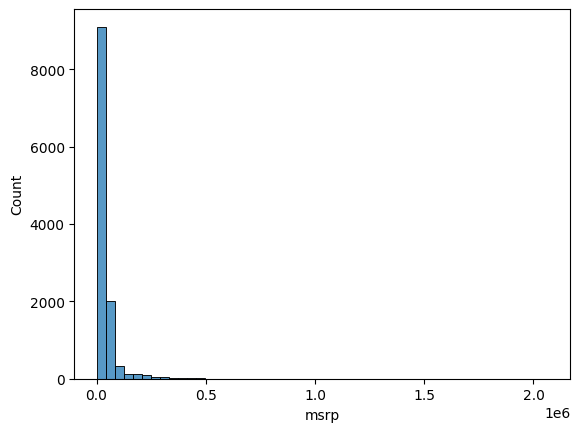

In [25]:
sns.histplot(df.msrp, bins=50) #LONG TAIL

In [26]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

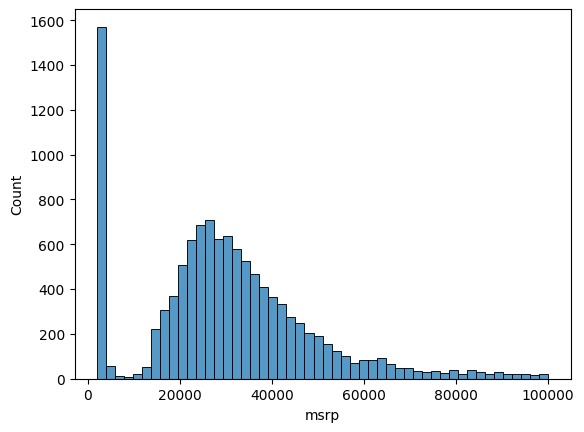

In [27]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50) #LONG TAIL

In [28]:
price_logs = np.log1p(df.msrp)

In [29]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

__Validation Framework__

In [35]:
n=int(len(df))

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [36]:
n, n_train

(11914, 7150)

In [54]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [55]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [58]:
idx = np.arange(n)

In [80]:
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [63]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
del df_test['msrp']
del df_val['msrp']
del df_train['msrp']

## 2.5 Linear regression

In [81]:
df_train.iloc[10]

make                          chevrolet
model                   c/k_1500_series
year                               1998
engine_fuel_type       regular_unleaded
engine_hp                         200.0
engine_cylinders                    6.0
transmission_type                manual
driven_wheels          rear_wheel_drive
number_of_doors                     2.0
market_category                     NaN
vehicle_size                      large
vehicle_style        regular_cab_pickup
highway_mpg                          21
city_mpg                             16
popularity                         1385
msrp                               2668
Name: 2652, dtype: object

In [89]:
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1]


In [90]:
def linear_regression(xi):
    #do something
    n=len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]+xi[j]
        
    return pred;

In [92]:
linear_regression(xi)

553

## Linear regression vector form

In [95]:
def dot(xi, w):
    n = len(xi)

    res=0.0

    for j in range(n):
        res+=xi[j]*w[j]

    return res

In [96]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [97]:
linear_regression(xi)

550.0